In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
batch_size = 32  # The default batch size of keras.
num_classes = 100  # Number of class for the dataset
epochs = 100

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

169001437/169001437 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# EfficientNetB0 Model

In [4]:
efficientnetb0 = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False, weights=None,input_shape=(32, 32, 3), pooling='avg')
x = tf.keras.layers.Dense(100, activation='softmax')(efficientnetb0.output)
efficientnetb0_model = tf.keras.Model(efficientnetb0.input, x)

In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

efficientnetb0_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [6]:
history1 = efficientnetb0_model.fit(x_train, y_train, epochs=20, batch_size=32, 
                                  validation_data=(x_test, y_test))

Epoch 1/20


2023-04-12 16:01:54.472488: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 100s 37ms/step - loss: 4.5978 - accuracy: 0.0243 - val_loss: 5.3019 - val_accuracy: 0.0357
Epoch 2/20
1563/1563 [==============================] - 54s 35ms/step - loss: 4.3085 - accuracy: 0.0477 - val_loss: 4.5038 - val_accuracy: 0.0636
Epoch 3/20
1563/1563 [==============================] - 58s 37ms/step - loss: 4.0928 - accuracy: 0.0689 - val_loss: 4.1342 - val_accuracy: 0.0947
Epoch 4/20
1563/1563 [==============================] - 56s 36ms/step - loss: 3.9142 - accuracy: 0.0937 - val_loss: 3.9371 - val_accuracy: 0.1161
Epoch 5/20
1563/1563 [==============================] - 58s 37ms/step - loss: 3.7759 - accuracy: 0.1134 - val_loss: 3.7534 - val_accuracy: 0.1343
Epoch 6/20
1563/1563 [==============================] - 58s 37ms/step - loss: 3.6413 - accuracy: 0.1367 - val_loss: 3.6967 - val_accuracy: 0.1570
Epoch 7/20
1563/1563 [==============================] - 57s 37ms/step - loss: 3.5203 - accuracy: 0.1542 - val_loss: 3.5417 - val_accur

In [7]:
efficientnetb0_model.save("efficientnetb0_model.h5")

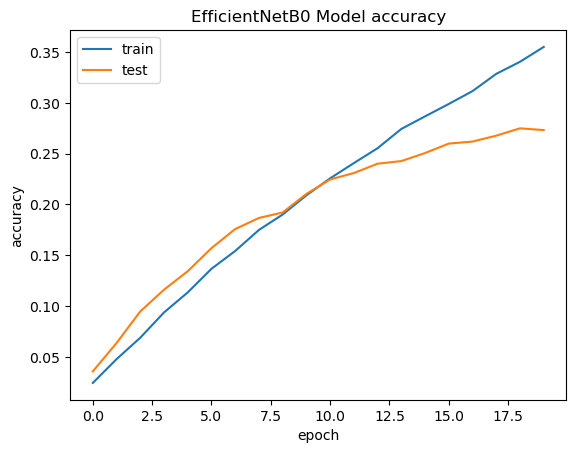

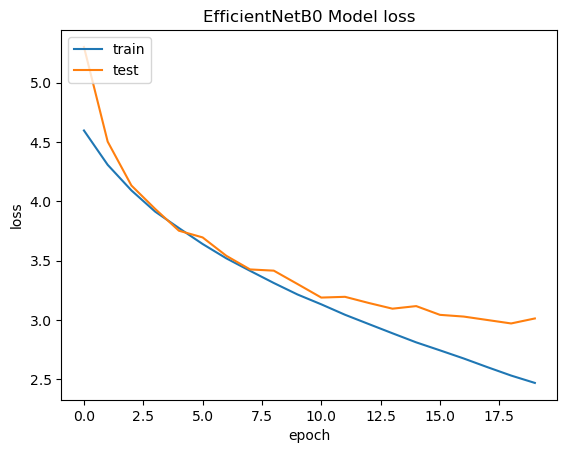

In [8]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('EfficientNetB0 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('EfficientNetB0 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# EfficientNetB1 Model

In [9]:
efficientnetb1 = tf.keras.applications.efficientnet.EfficientNetB1(include_top=False, weights=None,input_shape=(32, 32, 3), pooling='avg')
x1 = tf.keras.layers.Dense(100, activation='softmax')(efficientnetb1.output)
efficientnetb1_model = tf.keras.Model(efficientnetb1.input, x1)

In [10]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

efficientnetb1_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [11]:
history2 = efficientnetb1_model.fit(x_train, y_train, epochs=20,
                                    batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20


2023-04-12 16:22:12.736446: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 129s 52ms/step - loss: 4.6524 - accuracy: 0.0184 - val_loss: 5.3139 - val_accuracy: 0.0172
Epoch 2/20
1563/1563 [==============================] - 80s 51ms/step - loss: 4.4286 - accuracy: 0.0325 - val_loss: 4.7131 - val_accuracy: 0.0380
Epoch 3/20
1563/1563 [==============================] - 80s 51ms/step - loss: 4.2771 - accuracy: 0.0476 - val_loss: 4.3367 - val_accuracy: 0.0542
Epoch 4/20
1563/1563 [==============================] - 77s 49ms/step - loss: 4.1366 - accuracy: 0.0620 - val_loss: 4.1209 - val_accuracy: 0.0779
Epoch 5/20
1563/1563 [==============================] - 79s 51ms/step - loss: 4.0157 - accuracy: 0.0779 - val_loss: 3.9917 - val_accuracy: 0.0959
Epoch 6/20
1563/1563 [==============================] - 77s 50ms/step - loss: 3.9020 - accuracy: 0.0947 - val_loss: 3.8451 - val_accuracy: 0.1105
Epoch 7/20
1563/1563 [==============================] - 79s 51ms/step - loss: 3.7816 - accuracy: 0.1113 - val_loss: 3.6950 - val_accur

In [12]:
efficientnetb1_model.save("efficientnetb1_model.h5")

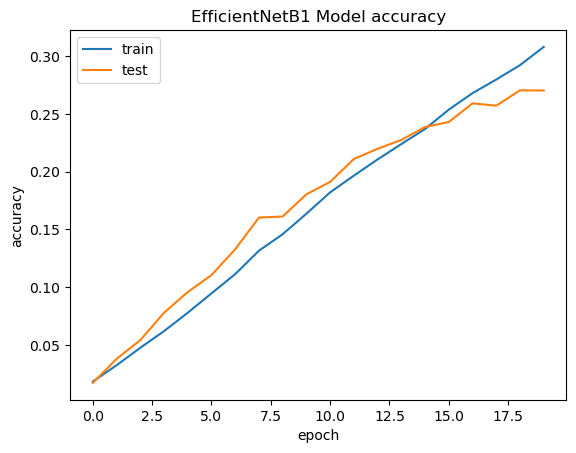

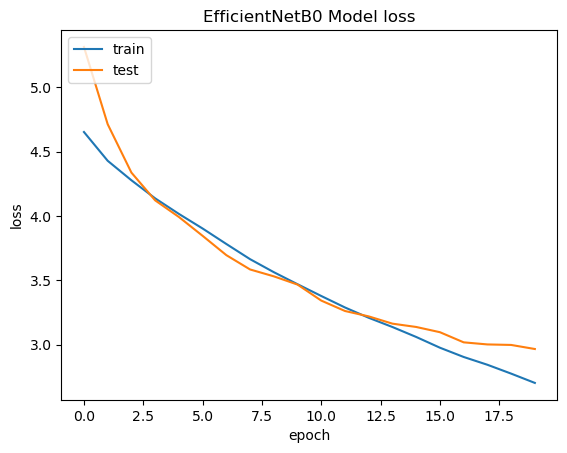

In [13]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('EfficientNetB1 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('EfficientNetB0 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# EfficientNetB2 Model

In [14]:
efficientnetb2 = tf.keras.applications.efficientnet.EfficientNetB2(include_top=False, weights=None,input_shape=(32, 32, 3), pooling='avg')
x3 = tf.keras.layers.Dense(100, activation='softmax')(efficientnetb2.output)
efficientnetb2_model = tf.keras.Model(efficientnetb2.input, x3)

In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

efficientnetb2_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [16]:
history3 = efficientnetb2_model.fit(x_train, y_train, epochs=20,
                                    batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20


2023-04-12 16:50:16.746329: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_2/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 139s 55ms/step - loss: 4.6479 - accuracy: 0.0185 - val_loss: 6.2312 - val_accuracy: 0.0208
Epoch 2/20
1563/1563 [==============================] - 80s 51ms/step - loss: 4.4370 - accuracy: 0.0325 - val_loss: 5.2866 - val_accuracy: 0.0371
Epoch 3/20
1563/1563 [==============================] - 82s 53ms/step - loss: 4.2665 - accuracy: 0.0503 - val_loss: 4.6268 - val_accuracy: 0.0580
Epoch 4/20
1563/1563 [==============================] - 80s 51ms/step - loss: 4.1126 - accuracy: 0.0639 - val_loss: 4.2855 - val_accuracy: 0.0725
Epoch 5/20
1563/1563 [==============================] - 84s 54ms/step - loss: 3.9783 - accuracy: 0.0788 - val_loss: 3.9731 - val_accuracy: 0.0973
Epoch 6/20
1563/1563 [==============================] - 87s 56ms/step - loss: 3.8431 - accuracy: 0.1015 - val_loss: 3.8721 - val_accuracy: 0.1231
Epoch 7/20
1563/1563 [==============================] - 91s 58ms/step - loss: 3.7044 - accuracy: 0.1221 - val_loss: 3.6404 - val_accur

In [17]:
efficientnetb2_model.save("efficientnetb2_model.h5")

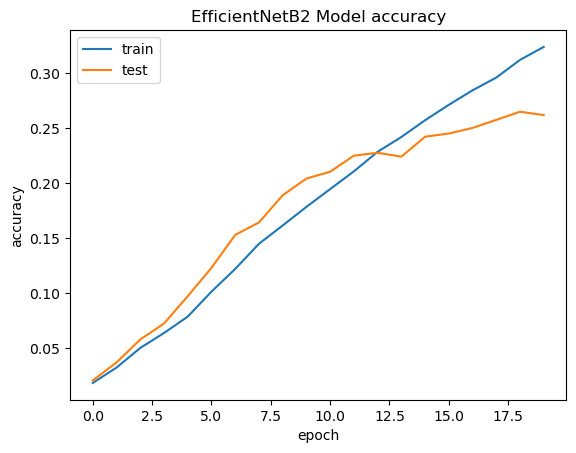

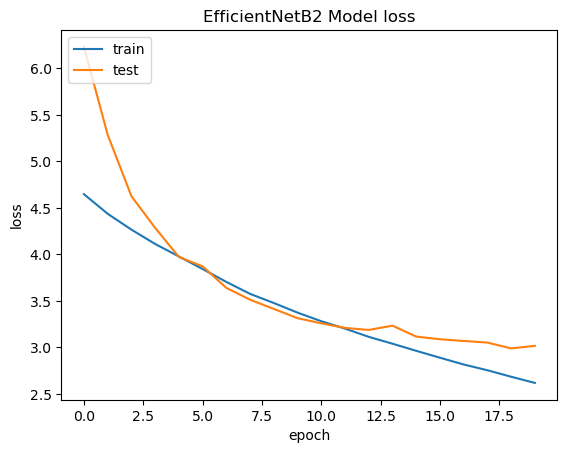

In [18]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('EfficientNetB2 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('EfficientNetB2 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# EfficientNetB3 Model

In [19]:
efficientnetb3 = tf.keras.applications.efficientnet.EfficientNetB3(include_top=False, weights=None,input_shape=(32, 32, 3), pooling='avg')
x4 = tf.keras.layers.Dense(100, activation='softmax')(efficientnetb3.output)
efficientnetb3_model = tf.keras.Model(efficientnetb3.input, x4)

In [20]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

efficientnetb3_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [21]:
history4 = efficientnetb3_model.fit(x_train, y_train, epochs=20,
                                    batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20


2023-04-12 17:20:07.460137: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 160s 66ms/step - loss: 4.6592 - accuracy: 0.0183 - val_loss: 5.5178 - val_accuracy: 0.0162
Epoch 2/20
1563/1563 [==============================] - 101s 65ms/step - loss: 4.4553 - accuracy: 0.0327 - val_loss: 5.0253 - val_accuracy: 0.0354
Epoch 3/20
1563/1563 [==============================] - 101s 65ms/step - loss: 4.2943 - accuracy: 0.0455 - val_loss: 4.5335 - val_accuracy: 0.0543
Epoch 4/20
1563/1563 [==============================] - 101s 64ms/step - loss: 4.1310 - accuracy: 0.0647 - val_loss: 4.1729 - val_accuracy: 0.0762
Epoch 5/20
1563/1563 [==============================] - 100s 64ms/step - loss: 3.9870 - accuracy: 0.0836 - val_loss: 3.9395 - val_accuracy: 0.1041
Epoch 6/20
1563/1563 [==============================] - 98s 63ms/step - loss: 3.8383 - accuracy: 0.1011 - val_loss: 3.8170 - val_accuracy: 0.1274
Epoch 7/20
1563/1563 [==============================] - 101s 65ms/step - loss: 3.7071 - accuracy: 0.1220 - val_loss: 3.6785 - val_

In [22]:
efficientnetb3_model.save("efficientnetb3_model.h5")

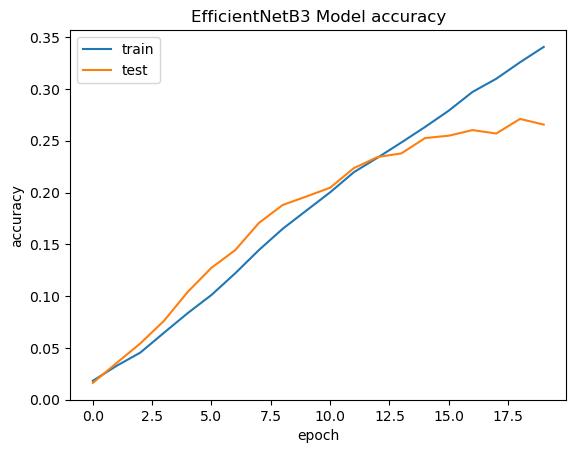

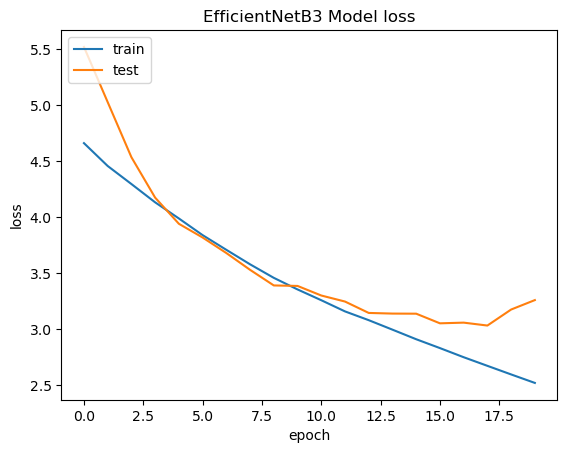

In [23]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('EfficientNetB3 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('EfficientNetB3 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()